# TensorFlow

TensorFlow es una plataforma desarrollada por google que facilita el desarrollo y mantenimiento de modelos de ML.

La arquitectura de TensorFlow tiene varios niveles de abstracción:
- En su primer nivel, su base, está su codigo de base en C++, ue realizará la mayor parte de los calculos
- Luego le sigue un nivel de de abstraccion que permite la invocacion del codigo C++ con python
- Finalmente, la tercera capa esta compuesta por:
    1. `Keras`: una biblioteca que permite el facil desarrollo de modelos de redes neuronales
    2. `Estimator`: una biblioteca con multiples plantillas o componentes prefabricados que permiten construir facilmente modelos de ML

### `TensorFlow` vs. `Sklearn`

| TensorFlow | Sklearn |
| ---------- | ------- |
| Su base en C++ permite utilizar grandes sets de datos de forma eficiente <ul><li>Permite la utilizacion de las tarjetas graficas para el <br> computo / entrenamiento de los modelos</li></ul> | Set de datos relativamente pequeños |
| Curva de aprendizaje alta | Curva de aprendizaje baja |
| Desarrollada tanto para Python como para JavaScript | Biblioteca de Python |
| Expone una mayor cantidad de parametros de configuracion para los modelos | <ul><li>Cantidad de entradas</li><li>Canitdad de capas ocultas</li><li>Cantidad de iteraciones</li></ul>|

## Tensores

Para trabajar con TensorFlow debemos utilizar "Tensores".

Los tensores son arrays multidimensionales de un tipo uniforme de dato. Son muy parecidos a los arrays de NumPy, pero con la ventaja de que son mucho mas eficientes y son capaces de ser utilizados en la memoria de las targetas graficas.

In [1]:
import tensorflow as tf

#### Constante

Un tensor cuyo valor no cambia:

In [2]:
c = tf.constant([1, 2, 3], dtype=tf.float32, name='una_constante')
print(c)

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


- Lo definimos indicando:
    - Su valor
    - Su tipo de dato
    - Su nombre (_opcional_)

#### Variable

Un tensor cuyo valor puede cambiar:

In [3]:
v = tf.Variable(3, dtype=tf.float32, name='una_variable')
print(v)

<tf.Variable 'una_variable:0' shape=() dtype=float32, numpy=3.0>


- Lo definimos utilizando los mismos parametros que para las constantes

Podemos reasignar su valor con `assign()`:

In [4]:
v.assign(10)
print(v)

<tf.Variable 'una_variable:0' shape=() dtype=float32, numpy=10.0>


- El valor asignado debe ser del mismo tipo y forma (`shape`)

#### Tensores y NumPy arrays

Podemos convertir arrays de NumPy en tensores constantes utilizando `convert_to_tensor()`:

In [5]:
import numpy as np

array = np.array([1,2,3])
tensor = tf.convert_to_tensor(array, tf.int32)
print(tensor)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


- Debemos indicarle el tipo de dato a utilizar

Esto funciona para arrays de cualquier forma y numero de dimensiones:

In [6]:
array2D = np.array([
    [1,2,3,4],
    [5,6,7,8]
])

tensor2D = tf.convert_to_tensor(array2D, tf.int32)
print(tensor2D)

tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)


Luego tambien podemos convertir tensores en arrays de NumPy con `numpy()`:

In [7]:
tensor2D.numpy()

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

#### Matriz vacia

Podemos construir matrices de ceros de cualquier forma sin necesidad de utilizar NumPy:

In [8]:
matrix0 = tf.zeros((5,5), tf.int32, name="matriz_ceros")
print(matrix0)

tf.Tensor(
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)


- Indicamos la forma
- y el tipo de dato

#### Trabajando con tensores

Desde la version 2.0 de TensorFlow podemos trabajar con los tensores commo lo hariamos con cualquier otro array de numpy.

Anteriormente, para trabajar con tensores debiamos inicializarlos y ejecutarlos en el contexto de una `Session` utilizando su metodo `session.run()`.

In [9]:
t1 = tf.constant(2, name="t1")
t2 = tf.constant([[1,2,3]], name="t2")
t3 = tf.constant([[4], [5], [6]], name="t3")

print(t1)
print(t2)
print(t3)
print("\nConstant mult:")
print(f"t1 * t2 = {t1 * t2}")
print("\nConstant division:")
print(f"t3 / t1 =\n{t3 / t1}")
print("\nMatrix mult:")
print(f"t2 x t3 =\n{t2 @ t3}")
print("\netc...")

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)
tf.Tensor(
[[4]
 [5]
 [6]], shape=(3, 1), dtype=int32)

Constant mult:
t1 * t2 = [[2 4 6]]

Constant division:
t3 / t1 =
[[2. ]
 [2.5]
 [3. ]]

Matrix mult:
t2 x t3 =
[[32]]

etc...


<br>

### Ejemplo de aplicación: *clasificacion de texto*

En este ejemplo clasificaremos la reseñas de varias peliculas como positivas o negativas. Para ello tomaremos los datos del dataset `imdb` de `keras`.

In [10]:
from tensorflow import keras

imdb = keras.datasets.imdb
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
S:\Anaconda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
S:\Anaconda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spec

Los datos ya vienen pre-procesados de forma tal que cada reseña (secuencias de palabras) se han convertido en secuencias de numeros enteros que representan, cada uno, una palabra especifica dentro de un diccionario generado a partir del parametro `num_words` (el numero de palabras del diccionario).

El diccionario mantiene las N palabras que aparecen con mayor frecuencia en los datos: Las palabras raras (poco frecuentes) fueron descartadas.

In [11]:
print("Reseña 0:")
print(f"Primeros 10 indices: {train_data[0][:10]}")
print(f"Indices totales: {len(train_data[0])}")

Reseña 0:
Primeros 10 indices: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
Indices totales: 218


Para convertir la secuencia de numeros enteros de nuevo a palabras utilizamos `get_word_index()`:

In [12]:
word_index = { word: index+3 for word, index in imdb.get_word_index().items() }
# Reservamos los primeros 3 indices para palabras especiales
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = { index: word for word, index in word_index.items() }

def decode_review(review_indices):
    return ' '.join([reverse_word_index[index] for index in review_indices])

Por lo tanto para la reseña 0:

In [13]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

Ahora debemos convertir estas secuencias de enteros en tensores para poder alimentarlos a la red neuronal.

Es importante notar que cada reseña tiene un tamaño distinto, por lo tanto, al mismo tiempo vamos a querer transformarlas para que todas tengan el mismo tamaño.
- El input de nuestra red tiene que ser siempre del mismo tamaño

Esto lo logramos utilizando `keras.preprocessing.sequence.pad_sequences()` que rellena con un determinado valor las secuencias de caracteres que tengan un tamaño menor al maximo dado, y truncan aquellas con un tamaño mayor.

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def pad_data(data_array):
    MAX_LEN = 256
    padded_array = pad_sequences(data_array, value=word_index["<PAD>"], maxlen=MAX_LEN, padding="post")
    return tf.convert_to_tensor(padded_array)

padded_train_data = pad_data(train_data)
padded_test_data = pad_data(test_data)

padded_train_data.shape

TensorShape([25000, 256])

- 25000 reseñas de 256 palabras cada una
- El parametro `maxlen`, en este caso, es un valor arbitrario que vamos a tomar para este ejemplo
    - Vamos a utilizar reseñas de 256 palabras
    - Si no se especifica, el valor por default es el de la frase / reseña más larga
- El parametro `padding` indica si agregar el valor al principio o al final de vector
    - Puede ser tanto "post" (al final) o "pre" (al principio), este es el default
    - Analogamente existe un parametro `truncating` que indica que valores sobrantes truncar, los del principio o los del final
        - Por default es "pre" y lo vamos a dejar así para este ejemplo

Podemos ver el padding en la primer reseña:

In [15]:
padded_train_data[0]

<tf.Tensor: shape=(256,), dtype=int32, numpy=
array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
     

Ahora que tenemos los datos de entrada del modelo listos, podemos pensar en el diseño del modelo.

Vamos a definir un modelo de red neuronal con las siguientes capas:
1. Una capa de tipo `Embedding`
2. Una capa de tipo `GlobalAveragePooling1D`
3. Una capa de tipo `Dense` con 16 neuronas y activacion "relu"
4. La capa de salida, de tipo `Dense` con una sola neurona (1 o 0, dos clasificaciones) y activacion "sigmoid" que retorna valores entre 0 y 1

##### Capa de tipo `Embedding`

Un problema que podemos encontrar cuando hacemos analisis de texto es ¿cómo hacer que nuestro modelo identifique palabras que tienen significados "similares"?

Por ejemplo, si en nuestro diccionario tenemos que:
```
diccionario["bueno"] == 4
diccionario["excelente"] == 22
```
Nosotros como personas podemos identificar que ambas palabras son similares, pero nuestros modelos las ven como 4 y 12, y no visualizan esta similitud.

La capa de tipo `Embedding` transforma cada elemento del input (un numero que representa una palabra) en un vector positivo de N dimensiones.

Recibe como parametro la cantidad de palabras del vocabulario utilizado (cantidad de palabras posibles) y genera un numero de pesos igual a la dimension a transformar por el tamaño del vocabulario.
- De esta forma genera internamente una tabla donde cada palabra posible tendrá asociada un vector de N dimensiones dado por N de los pesos de la capa
- Por ejemplo, para un vocabulario de tamaño 4 y transformando las palabras a vectores de 2 dimensiones se obtiene:
| vocabulario | embedding |
| :---------: | :-------: |
| 0 | \[w1, w2\] |
| 1 | \[w3, w4\] |
| 2 | \[w5, w6\] |
| 3 | \[w7, w8\] |

Con estos nuevos parametros, se logra que, una vez optimizados, la codificacion de palabras con significados "similares" sea parecida.

_[Excelente post sobre como funciona la capa **Embedding**](https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work)_

##### Capa de tipo `GlobalAveragePooling1D`

Las capas de tipo `Pooling` reducen el numero de dimensiones del output de la capa anterior procurando mantener la informacion del mismo. Estas capas no agregan nuevos parametros para optimizar, ya que existen multiples estrategias predifinidas, como `Max` y `Average`, que se utilizan para conseguir este resultado.

En particular `GlobalAveragePooling1D` convierte un output de 2 dimensiones a un vector de 1 dimensión calculando el promedio de cada vector que representa una palabra.
- Ej si lo que recibe es `[[1,1], [1, 3], ..., [5, 3]]` lo convertirá en `[1, 2, ..., 4]`

Por lo tanto, las capas de `Encoding` y `Pooling` se encargan de procesar nuevamente nuestro diccionario generando una nueva codificación que contemplará una mayor cantidad de informacion como la similitud de significados entre palabras.

Finalmente podemos contruir el modelo de la siguiente manera:

In [16]:
vocabulary_size = len(word_index)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocabulary_size, 16))  # Codificamos las palabras con vectores de 16 dimenciones
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          1417408   
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,417,697
Trainable params: 1,417,697
Non-trainable params: 0
_________________________________________________________________


- Observese en qué etapa estan enfocados la mayor parte de los parametros a optimizar

Compilamos el modelo:

In [17]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

Podemos crear un conjunto de validación a partir del conjunto de entrenamiento. 

El conjunto de validacion es un conjunto de datos que no se utilizaran para entrenar el modelo. Difiere del conjunto de pruebas en que el primero se utiliza **durante** el entrenamiento para ir teniendo, con cada iteracion, una evaluación imparcial de la eficacia de nuestro modelo.

In [18]:
validation_data = padded_train_data[:10000]
validation_target = train_target[:10000]

final_train_data = padded_train_data[10000:]
final_train_target = train_target[10000:]
                                  
print(len(final_train_data), len(final_train_target))

15000 15000


Ahora si podemos entrenar nuestro modelo utilizando el parametro `validation_data` para indicar nuestro conjunto de validacion:

In [19]:
history = model.fit(
    final_train_data, 
    final_train_target, 
    epochs=40, 
    batch_size=512, 
    validation_data=(validation_data, validation_target), 
    verbose=0  # No queremos que escriba nada ya que ocuparia toda la pantalla (40 epochs)
)

print("Listo!")

Listo!


- `batch_size`: en cada iteracion (epoch) el modelo no necesariamente debe iterar sobre todos los datos de entrenamiento. Podemos hace que utilice, cada vez, un subconjunto random de tamaño reducido para asi hacer mas rapido el entrenamiento. El *batch size*, entonces, es el tamaño que se va a utilizar para dichos subconjuntos

Como definimos el parametro `verbose` en 0, no podemos ver el progreso del modelo con cada iteración. Pero el metodo `fit()` retorna un objeto de tipo `History` que contiene un diccionario con los valores de las metricas en cada iteracion del entrenamiento.

In [20]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Gracias a esto, podemos obtener una representacion visual de la evolución:

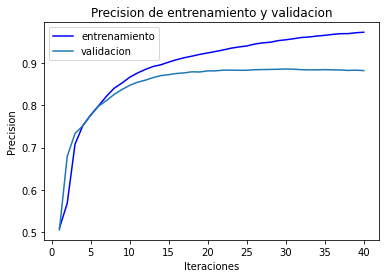

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history

n_epochs = len(history_dict["acc"])
epochs = np.arange(1, n_epochs+1)

# Graficamos las metricas del conjunto de entrenamiento
plt.plot(epochs, history_dict["acc"], "b", label="entrenamiento")

# Graficamos las metricas del conjunto de validacion
plt.plot(epochs, history_dict["val_acc"], label="validacion")

plt.title("Precision de entrenamiento y validacion")
plt.xlabel("Iteraciones")
plt.ylabel("Precision")
plt.legend()
plt.show()

Finalmente probamos la precision de nuestro modelo utilizando el conjunto de prueba:

In [22]:
results = model.evaluate(padded_test_data, test_target)
print(f"Precisión: {round(results[1]*100, 2)}%")

782/782 [==============================] - 1s 682us/step - loss: 0.3284 - acc: 0.8713
Precisión: 87.13%
